# Paired T Test
 - An assumption of the Two Sample T Test is the two datasets are independent. That is, the rows for the two columns of data are not related in the sense one is predictive of the other. There isn’t a natural paired order.
 - Unlike a Two Sample T Test, responses for a paired T Test are not independent but dependent. For each sample row, there is something common. In the example that will follow, Device A and B will measure same samples of airbag fabric.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stats_plots import qqplot
from stats_tests import paired_ttest
plt.style.use('classic')

In [2]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(
        xls,
        sheet_name="Paired T Test",
        usecols = ["Sample", "Device A",
                   "Device B",
                   "Differences"]
    )
    .dropna(how="all")  # drop rows where all columns are NaN
)
# Strip whitespace from column names
df.columns = df.columns.str.strip()
df.head()

,Sample,Device A,Device B,Differences
0,1,0.030837,0.033921,0.003084
1,2,0.028890,0.031779,0.002889
2,3,0.030107,0.033118,0.003011
3,4,0.029378,0.032316,0.002938
4,5,0.029524,0.032477,0.002952


## Check if the differences are normally distributed
 - As noted prior, the $\textbf{differences}$ must be normally distributed, not the original data.


A² (raw): 0.2734
A²* (adj.): 0.3001
Approx. p-value: 0.5824


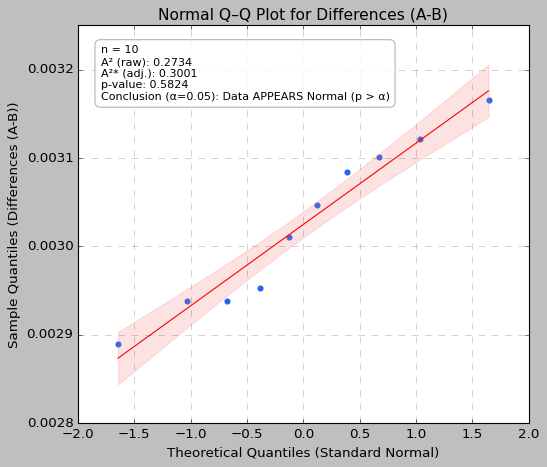

In [3]:
result = qqplot(df["Differences"], label="Differences (A-B)")

=== Descriptive Statistics ===
       Device A   Device B  Difference (Device A - Device B)
N     10.000000  10.000000                         10.000000
Mean   0.030246   0.033271                         -0.003025
Std    0.000929   0.001022                          0.000093
Min    0.028890   0.031779                         -0.003165
Max    0.031654   0.034820                         -0.002889

Difference calculated as: Device A - Device B
95% CI for mean difference: (-0.003091, -0.002958)
Mean difference = -0.003025

=== Paired t-test ===
t-statistic: -102.965
p-value: 0.000
Reject null hypothesis: mean difference is significant


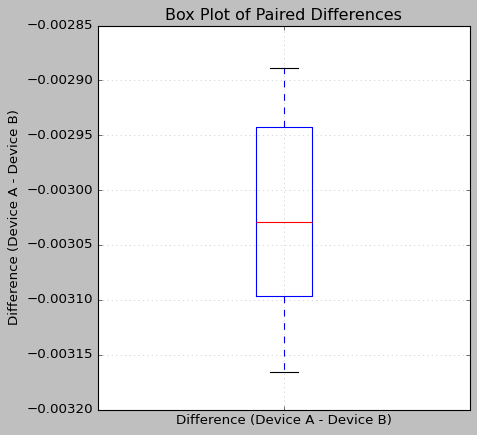

In [4]:
result = paired_ttest(df["Device A"], df["Device B"])

## Graphical results
 - Box plot generated by the analysis.
 - Note that the ho is not within the confidence interval of the mean (X-bar).
 - Visually there appears to be a difference.
 - Confirm with the session window output, next step.


## Output conclusions
 - Note that the P-value is less than 0.05, so conclude there is a difference.

## Summary
- Device B thickness tester (used on airbags that failed) was compared to Device A (used on airbags that didn't fail).
- Device B is confirmed to give a false high reading, which leads to an over-calibration of the fabric machine, leading to thinner fabric.